## Working Title: 
Exploring the relationship between average minutes per game and number of aces to predict surface type of the court the match was played on

## Preliminary exploratory data analysis

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
install.packages("stringr")
set.seed(2022)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [31]:
tennis_data <- read_csv("atp2017-2019.csv") |>
    select("...1", "surface", "score", "minutes", "w_ace", "l_ace") |> #only useful columns
    filter(minutes != "NA") |> #remove unknown match times
    mutate(total_aces = w_ace + l_ace) |> #combined winner aces and loser aces
    mutate(total_games = sub("\\(.*\\)", "", score)) |> #remove (...) 
    mutate(total_games = str_replace_all(total_games, c("-" = " ", " " = ","))) |> #remove dashes and spaces; 
                                                                                   #replace with commas
    mutate(total_games = str_extract_all(total_games, "[123456789]")) #extract the numbers as a character list

sum_character_list <- function(x) sum(as.numeric(unlist(x))) #function to convert character list to sum of those numbers

tennis_data$total_games <- lapply(tennis_data$total_games, sum_character_list) #apply function to total_games column

tennis_data <- mutate(tennis_data, total_games = as.numeric(total_games)) #convert to double
                               
tennis_data_wrangled <- tennis_data |>
    mutate(minutes_per_game = minutes / total_games) |>
    rename("observation" = "...1") |>
    filter(surface != "None") |>
    select("observation", "surface", "total_aces", "minutes_per_game")

tennis_data_wrangled

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


observation,surface,total_aces,minutes_per_game
<dbl>,<chr>,<dbl>,<dbl>
0,Hard,11,4.592593
1,Hard,27,3.904762
2,Hard,12,4.125000
3,Hard,13,4.608696
4,Hard,41,4.031250
5,Hard,22,3.968750
6,Hard,13,4.166667
7,Hard,14,4.545455
8,Hard,6,4.444444


Warning message:
“Removed 3 rows containing missing values (geom_point).”


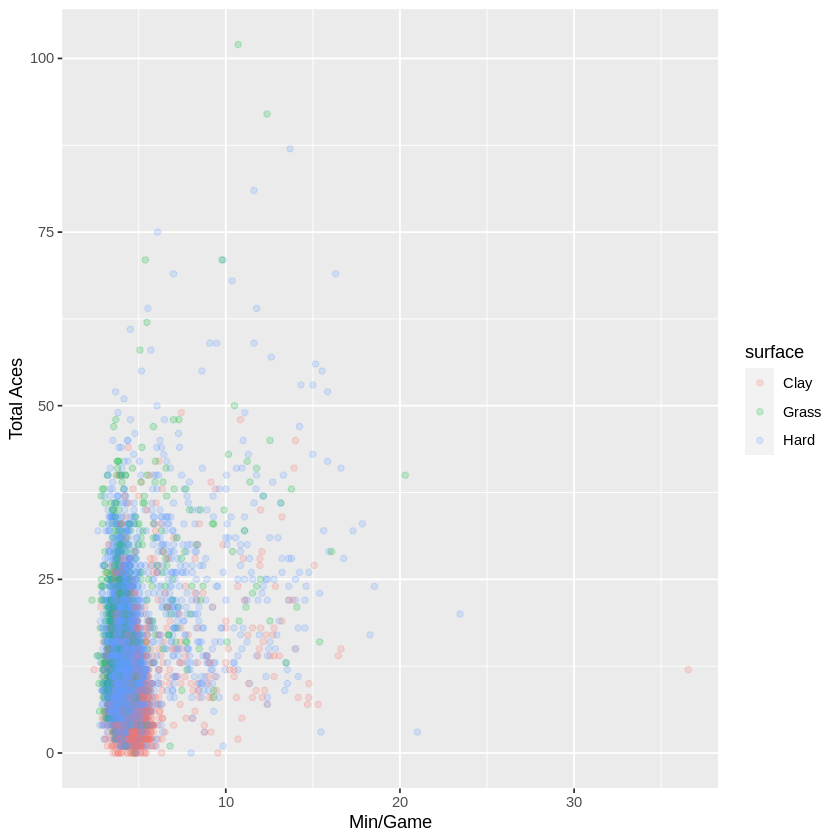

In [36]:
tennis_plot <- ggplot(tennis_data_wrangled, aes(x=minutes_per_game, y=total_aces, color=surface))+
    geom_point(alpha=0.2)+
    xlab("Min/Game")+
    ylab("Total Aces")

tennis_plot